In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
csv_file_path = "../data/df_all_idvg.csv"
df = pd.read_csv(csv_file_path)

# 1. Analyze the cyclical nature of 'Vgs'
# Find the first value of Vgs
first_vgs_value = df["Vgs"][0]

# Find the index of the next occurrence of the first value
# We search in the rest of the dataframe (from index 1 onwards)
try:
    vgs_period = df[df["Vgs"] == first_vgs_value].index[1]
    print(f"Vgs 值的周期為: {vgs_period}")
except IndexError:
    print("Vgs 值沒有重複，無法確定周期。")


# 2. Count unique values for 'Vds', 'length', 'finger', and 'width'
unique_vds = df["Vds"].nunique()
unique_length = df["length"].nunique()
unique_finger = df["finger"].nunique()
unique_width = df["width"].nunique()

print(f"Vds 的不同值數量: {unique_vds}")
print(f"length 的不同值數量: {unique_length}")
print(f"finger 的不同值數量: {unique_finger}")
print(f"width 的不同值數量: {unique_width}")

if unique_vds < 20:
    print(f"Vds 的不同值: {df['Vds'].unique()}")
if unique_length < 20:
    print(f"length 的不同值: {df['length'].unique()}")
if unique_finger < 20:
    print(f"finger 的不同值: {df['finger'].unique()}")
if unique_width < 20:
    print(f"width 的不同值: {df['width'].unique()}")

Vgs 值的周期為: 49
Vds 的不同值數量: 10
length 的不同值數量: 1
finger 的不同值數量: 3
width 的不同值數量: 5
Vds 的不同值: [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
length 的不同值: [25.]
finger 的不同值: [2. 4. 8.]
width 的不同值: [ 25.  50.  75. 100. 150.]


In [2]:
combinations = df[["Vds", "finger", "width"]]

unique_combinations = combinations.drop_duplicates()

num_combinations = len(unique_combinations)

print(f"(Vds, finger, width) 的組合共有 {num_combinations} 種")

print("所有組合如下:")
print(unique_combinations.to_string(index=False))

(Vds, finger, width) 的組合共有 130 種
所有組合如下:
 Vds  finger  width
 0.5     2.0   25.0
 1.0     2.0   25.0
 1.5     2.0   25.0
 2.0     2.0   25.0
 2.5     2.0   25.0
 3.0     2.0   25.0
 3.5     2.0   25.0
 4.0     2.0   25.0
 4.5     2.0   25.0
 5.0     2.0   25.0
 0.5     2.0   50.0
 1.0     2.0   50.0
 1.5     2.0   50.0
 2.0     2.0   50.0
 2.5     2.0   50.0
 3.0     2.0   50.0
 3.5     2.0   50.0
 4.0     2.0   50.0
 4.5     2.0   50.0
 5.0     2.0   50.0
 0.5     2.0   75.0
 1.0     2.0   75.0
 1.5     2.0   75.0
 2.0     2.0   75.0
 2.5     2.0   75.0
 3.0     2.0   75.0
 3.5     2.0   75.0
 4.0     2.0   75.0
 4.5     2.0   75.0
 5.0     2.0   75.0
 0.5     2.0  100.0
 1.0     2.0  100.0
 1.5     2.0  100.0
 2.0     2.0  100.0
 2.5     2.0  100.0
 3.0     2.0  100.0
 3.5     2.0  100.0
 4.0     2.0  100.0
 4.5     2.0  100.0
 5.0     2.0  100.0
 0.5     2.0  150.0
 1.0     2.0  150.0
 1.5     2.0  150.0
 2.0     2.0  150.0
 2.5     2.0  150.0
 3.0     2.0  150.0
 3.5     2.0  150.0

In [33]:
vds_value = df["Vds"][0]
filtered_df = df[df["Vds"] == vds_value]

ugw_n_combinations = filtered_df[["width", "finger"]].drop_duplicates()
ugw_n_values = [
    (row["width"], row["finger"]) for _, row in ugw_n_combinations.iterrows()
]
print(ugw_n_values)

[(np.float64(25.0), np.float64(2.0)), (np.float64(50.0), np.float64(2.0)), (np.float64(75.0), np.float64(2.0)), (np.float64(100.0), np.float64(2.0)), (np.float64(150.0), np.float64(2.0)), (np.float64(25.0), np.float64(4.0)), (np.float64(50.0), np.float64(4.0)), (np.float64(75.0), np.float64(4.0)), (np.float64(100.0), np.float64(4.0)), (np.float64(150.0), np.float64(4.0)), (np.float64(25.0), np.float64(8.0)), (np.float64(100.0), np.float64(8.0)), (np.float64(150.0), np.float64(8.0))]


In [34]:
import numpy as np
print(f"測試 Vds={vds_value} 的數據長度:")
print(f"總共有 {len(ugw_n_values)} 個 (width, finger) 組合\n")

data_lengths = {}
all_vgs_sets = {}

for i, (width, finger) in enumerate(ugw_n_values):
    # 篩選特定 (width, finger) 組合的數據
    combo_data = filtered_df[
        (filtered_df["width"] == width) &
        (filtered_df["finger"] == finger)
    ].sort_values("Vgs")
    
    data_length = len(combo_data)
    data_lengths[(width, finger)] = data_length
    all_vgs_sets[(width, finger)] = combo_data["Vgs"].values
    
    print(f"{i+1:2d}. (width={width:4.1f}, finger={finger:4.1f}): {data_length:2d} 個數據點")
    
    if data_length > 0:
        vgs_range = f"Vgs: {combo_data['Vgs'].min():.3f} ~ {combo_data['Vgs'].max():.3f}"
        ids_range = f"Ids: {combo_data['Ids'].min():.2e} ~ {combo_data['Ids'].max():.2e}"
        print(f"     {vgs_range}, {ids_range}")
    else:
        print("     ❌ 沒有數據！")
    print()

# 統計分析
lengths = list(data_lengths.values())
unique_lengths = set(lengths)

print("="*60)
print("📊 數據長度統計:")
print(f"   最短: {min(lengths)} 個數據點")
print(f"   最長: {max(lengths)} 個數據點")
print(f"   平均: {sum(lengths)/len(lengths):.1f} 個數據點")
print(f"   不同長度數量: {len(unique_lengths)}")

if len(unique_lengths) == 1:
    print("   ✅ 所有組合的數據長度一致！")
else:
    print("   ⚠️  不同組合的數據長度不一致！")
    print("\n📋 按長度分組:")
    for length in sorted(unique_lengths):
        combos = [combo for combo, len in data_lengths.items() if len == length]
        print(f"   {length:2d} 個數據點: {len(combos)} 個組合")
        for combo in combos[:3]:  # 只顯示前3個
            print(f"      - {combo}")
        if len(combos) > 3:
            print(f"      - ... 還有 {len(combos)-3} 個")

# 檢查 Vgs 值是否一致
print("\n🔍 Vgs 值一致性檢查:")
if len(all_vgs_sets) > 1:
    first_vgs = list(all_vgs_sets.values())[0]
    all_same = True
    for combo, vgs_values in all_vgs_sets.items():
        if len(vgs_values) > 0 and len(first_vgs) > 0:
            if len(vgs_values) == len(first_vgs) and np.allclose(vgs_values, first_vgs, atol=1e-6):
                continue
            else:
                all_same = False
                print(f"   ⚠️  {combo} 的 Vgs 值與第一組不同")
    
    if all_same:
        print("   ✅ 所有組合的 Vgs 值都一致！")

測試 Vds=0.5 的數據長度:
總共有 13 個 (width, finger) 組合

 1. (width=25.0, finger= 2.0): 49 個數據點
     Vgs: 0.000 ~ 1.200, Ids: 1.18e-05 ~ 4.70e+02

 2. (width=50.0, finger= 2.0): 49 個數據點
     Vgs: 0.000 ~ 1.200, Ids: 2.81e-05 ~ 4.49e+02

 3. (width=75.0, finger= 2.0): 49 個數據點
     Vgs: 0.000 ~ 1.200, Ids: 1.86e-05 ~ 4.28e+02

 4. (width=100.0, finger= 2.0): 49 個數據點
     Vgs: 0.000 ~ 1.200, Ids: 2.29e-05 ~ 4.09e+02

 5. (width=150.0, finger= 2.0): 49 個數據點
     Vgs: 0.000 ~ 1.200, Ids: 1.84e-05 ~ 3.78e+02

 6. (width=25.0, finger= 4.0): 45 個數據點
     Vgs: 0.100 ~ 1.200, Ids: 5.39e-04 ~ 4.57e+02

 7. (width=50.0, finger= 4.0): 45 個數據點
     Vgs: 0.100 ~ 1.200, Ids: 6.86e-04 ~ 4.22e+02

 8. (width=75.0, finger= 4.0): 49 個數據點
     Vgs: 0.000 ~ 1.200, Ids: 1.96e-05 ~ 3.90e+02

 9. (width=100.0, finger= 4.0): 49 個數據點
     Vgs: 0.000 ~ 1.200, Ids: 1.32e-05 ~ 3.65e+02

10. (width=150.0, finger= 4.0): 49 個數據點
     Vgs: 0.000 ~ 1.200, Ids: 1.87e-05 ~ 3.19e+02

11. (width=25.0, finger= 8.0): 45 個數據點
     Vgs: 

In [11]:
import verilogae
from dotenv import load_dotenv
import numpy as np

vds_value = df["Vds"][0]
finger_value = df["finger"][0]
width_value = df["width"][0]
print(
    f"使用的 vds_value: {vds_value}, finger_value: {finger_value}, width_value: {width_value}"
)

load_dotenv()
eehemt_file_path = os.getenv("VA_FILE_PATH", "")
TEMPERATURE = int(os.getenv("TEMPERATURE", 300))
filtered_vgs = df[
    (df["Vds"] == vds_value)
    & (df["finger"] == finger_value)
    & (df["width"] == width_value)
]["Vgs"].values
vds = np.full_like(filtered_vgs, vds_value)
sweep_bias = {
    "br_gisi": filtered_vgs,
    "br_disi": vds,
    "br_t": filtered_vgs,
    "br_esi": filtered_vgs,
}
eehemt_model = verilogae.load(eehemt_file_path)
init_params = {
    name: param.default for name, param in eehemt_model.modelcard.items()
}

eehemt_model.functions
# i_eehemt = eehemt_model.functions["Ids"].eval(
#     temperature=TEMPERATURE,
#     voltages=sweep_bias,
#     **init_params | {"UGW": width_value, "NOF": finger_value},
# )

使用的 vds_value: 0.5, finger_value: 2.0, width_value: 25.0


{'Igs': <verilogae.VaeFun at 0x7fd0f1eeeb40>,
 'Igd': <verilogae.VaeFun at 0x7fd0f1eeea70>,
 'Ids': <verilogae.VaeFun at 0x7fd0f1eeedb0>}

In [21]:
def normalize_i(
    i: np.ndarray | pd.Series,
    n_finger: float = 2.0,
    width: float = 25.0,
):
    return i * 1e6 / (n_finger * width)

In [29]:
def plot_fixed_vds_finger_width_iv_curve(
    csv_file_path: str,
    vds_value: float,
    finger_value: float,
    width_value: float,
    i_eehemt: np.ndarray,
    plot_dir: str = "plots",
    log_y: bool = True,
    save_plot: bool = False,
):
    """
    繪製固定 (Vds, finger, width) 條件下的 I-V 曲線圖

    Args:
        csv_file_path (str): CSV 檔案路徑
        vds_value (float): 固定的 Vds 值
        finger_value (float): 固定的 finger 值
        width_value (float): 固定的 width 值
        plot_dir (str): 儲存圖片的資料夾路徑
        log_y (bool): 是否使用對數 y 軸
        save_plot (bool): 是否儲存圖片
    """

    # 讀取 CSV 數據
    df = pd.read_csv(csv_file_path)

    # 篩選固定條件的數據
    filtered_df = df[
        (df["Vds"] == vds_value)
        & (df["finger"] == finger_value)
        & (df["width"] == width_value)
    ].copy()

    if filtered_df.empty:
        print(
            f"找不到符合條件的數據: Vds={vds_value}, finger={finger_value}, width={width_value}"
        )
        return

    # 按 Vgs 排序
    filtered_df = filtered_df.sort_values("Vgs")

    # 創建圖形
    fig, ax = plt.subplots(figsize=(10, 7))

    # 繪製 Ids (測量數據)
    ax.plot(
        filtered_df["Vgs"],
        normalize_i(filtered_df["Ids"]),
        marker="o",
        linestyle="-",
        color="blue",
        label="Measured Data (Ids)",
        markersize=4,
        linewidth=2,
    )

    # 繪製 Ids_coarse (模擬數據)
    ax.plot(
        filtered_df["Vgs"],
        normalize_i(filtered_df["Ids_coarse"]),
        marker="s",
        linestyle="--",
        color="red",
        label="Ids_coarse",
        markersize=3,
        linewidth=2,
    )

    ax.plot(
        filtered_df["Vgs"],
        normalize_i(i_eehemt),
        marker="D",
        linestyle="--",
        color="purple",
        label="EEHEMT Model",
        markersize=3,
        linewidth=2,
    )

    # 設定圖形樣式和標籤
    ax.set_title(
        f"I-V Curve Comparison\n(Vds={vds_value}V, finger={finger_value}, width={width_value}μm)"
    )
    ax.set_xlabel("Gate Voltage (Vg) [V]")

    if log_y:
        ax.set_ylabel("Log Drain Current (Id) [A]")
        ax.set_yscale("log")
        # 設定 y 軸下限，避免對數軸顯示問題
        min_current = min(filtered_df["Ids"].min(), filtered_df["Ids_coarse"].min())
        if min_current <= 0:
            ax.set_ylim(bottom=1e-6)
    else:
        ax.set_ylabel("Drain Current (Id) [A]")

    # 添加網格和圖例
    ax.grid(True, which="both", ls="--", alpha=0.7)
    ax.legend(loc="best")

    # 儲存圖片
    if save_plot:
        os.makedirs(plot_dir, exist_ok=True)
        log_suffix = "_log" if log_y else ""
        filename = f"iv_curve_Vds{vds_value}_finger{finger_value}_width{width_value}{log_suffix}.png"
        save_path = os.path.join(plot_dir, filename)

        plt.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"==== I-V curve plot saved in {save_path} ====")

    plt.show()
    plt.close(fig)

    # 顯示統計資訊
    print(f"數據點數量: {len(filtered_df)}")
    print(
        f"Vgs 範圍: {filtered_df['Vgs'].min():.3f} V 到 {filtered_df['Vgs'].max():.3f} V"
    )
    print(
        f"Ids 範圍: {filtered_df['Ids'].min():.2e} A 到 {filtered_df['Ids'].max():.2e} A"
    )

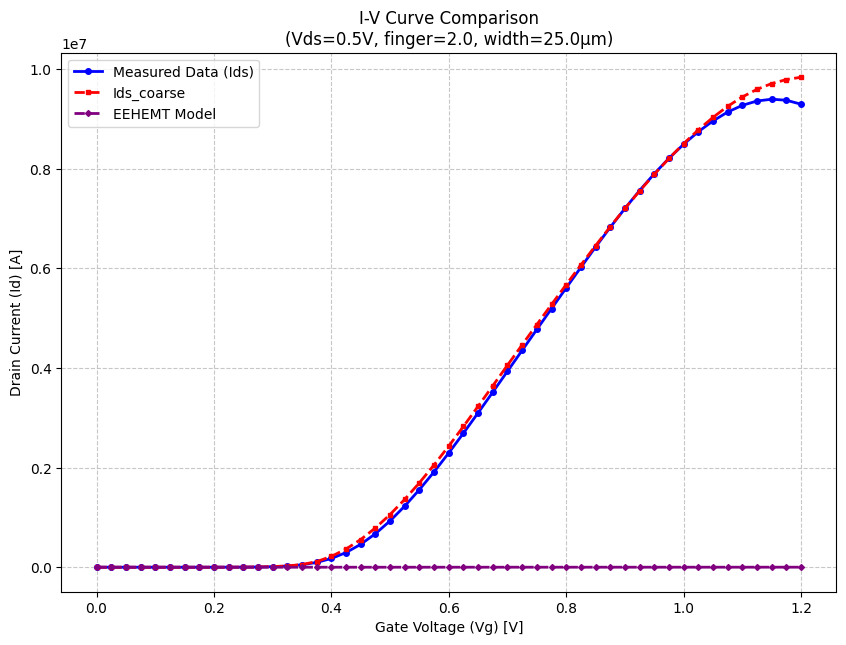

數據點數量: 49
Vgs 範圍: 0.000 V 到 1.200 V
Ids 範圍: 1.18e-05 A 到 4.70e+02 A


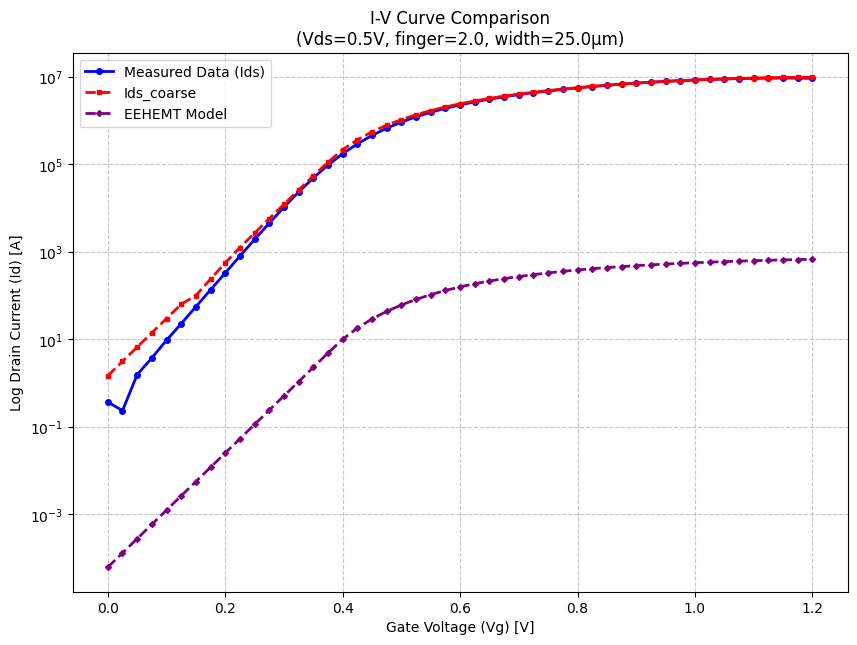

數據點數量: 49
Vgs 範圍: 0.000 V 到 1.200 V
Ids 範圍: 1.18e-05 A 到 4.70e+02 A


In [32]:
plot_fixed_vds_finger_width_iv_curve(
    csv_file_path=csv_file_path,
    vds_value=vds_value,
    finger_value=finger_value,
    width_value=width_value,
    i_eehemt=i_eehemt,
    log_y=False,
)

plot_fixed_vds_finger_width_iv_curve(
    csv_file_path=csv_file_path,
    vds_value=vds_value,
    finger_value=finger_value,
    width_value=width_value,
    i_eehemt=i_eehemt,
    log_y=True,
)